In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
def print_analysis(model):
    print()
    print('=' * 20)
    print('Params:')
    print(model.params)
    print()
    print('p-values:')
    print(model.pvalues)
    print('=' * 20)

In [4]:
# 14 (a)

np.random.seed(1)
x1 = np.random.uniform(size=100)
x2 = 0.5*x1 + np.random.randn(100)/10
y  = 2 + 2*x1 + 0.3*x2 + np.random.randn(100)

$$ y = b_0 + b_1 x_1 + b_2 x_2 + \epsilon $$

$$ b_0 = 2 $$
$$ b_1 = 2 $$
$$ b_2 = 0.3 $$

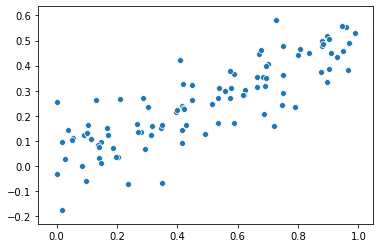

In [5]:
# 14 (b)

sns.scatterplot(x=x1, y=x2);


There might be linear relationship here

In [6]:
# 14 (c)

df = pd.DataFrame({'y': y, 'x1': x1, 'x2': x2})
model = smf.ols(formula='y ~ x1 + x2', data=df).fit()
print_analysis(model)


Params:
Intercept    2.189284
x1           0.704629
x2           2.502405
dtype: float64

p-values:
Intercept    8.532403e-19
x1           2.712146e-01
x2           3.060418e-02
dtype: float64


$$ b_0 = 2, b_0' = 2.19, p_{b_0'} =  8.5e-19 $$
$$ b_1 = 2, b_1' = 0.7, p_{b_1'} =  0.27 $$
$$ b_2 = 0.3, b_2' = 2.5, p_{b_2'} =  0.03 $$

I cannot reject null hypothesis for $b_1'$ as p-value = 0.27 > 0.05, however I can reject null hypothesis for $b_2'$ as p-value = 0.03 < 0.05.


In [7]:
# 14 (d)

df = pd.DataFrame({'y': y, 'x1': x1, 'x2': x2})
model = smf.ols(formula='y ~ x1', data=df).fit()
print_analysis(model)



Params:
Intercept    2.248581
x1           1.876987
dtype: float64

p-values:
Intercept    2.942644e-19
x1           6.683125e-07
dtype: float64


$$ b_0 = 2, b_0' = 2.25, p_{b_0'} =  2.94e-19 $$
$$ b_1 = 2, b_1' = 1.88, p_{b_1'} =  6.68e-07 $$

I can reject null hypothesis for $b_1'$ as p-value << 0.05.


In [8]:
# 14 (e)

df = pd.DataFrame({'y': y, 'x1': x1, 'x2': x2})
model = smf.ols(formula='y ~ x2', data=df).fit()
print_analysis(model)


Params:
Intercept    2.265526
x2           3.561276
dtype: float64

p-values:
Intercept    2.952030e-21
x2           1.090964e-07
dtype: float64


$$ b_0 = 2, b_0' = 2.25, p_{b_0'} =  2.952030e-21 $$
$$ b_2 = 0.3, b_2' = 3.56, p_{b_2'} =  1.090964e-07 $$

I can reject null hypothesis for $b_2'$ as p-value << 0.05.

In [9]:
# 14 (f)

# in (c) cannot reject null for b1, can for b2
# in (d) can reject null for b1
# in (e) can reject null for b2

# b1 & b2 are correlated and they mask each other results


Results are results

In [13]:
# 14 (g)

df2 = df.append({'x1': 0.1, 'x2': 0.8, 'y': 6}, ignore_index=True)
# Fit models
model_c = smf.ols(formula='y ~ x1 + x2', data=df2).fit()
model_d = smf.ols(formula='y ~ x1', data=df2).fit()
model_e = smf.ols(formula='y ~ x2', data=df2).fit()

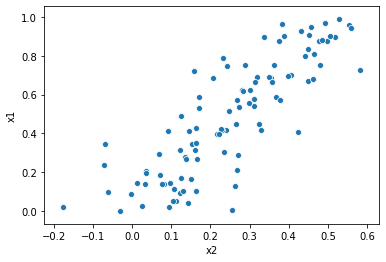

In [14]:
sns.scatterplot(x=df['x2'], y=df['x1']);

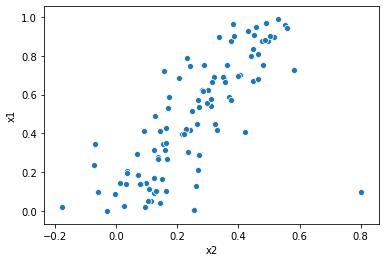

In [12]:
sns.scatterplot(x=df2['x2'], y=df2['x1']);

In [11]:
# model_c.summary()
print_analysis(model_c)
print_analysis(model_d)
print_analysis(model_e)


Params:
Intercept    2.199575
x1           0.220026
x2           3.439188
dtype: float64

p-values:
Intercept    6.778773e-19
x1           6.732535e-01
x2           2.054951e-04
dtype: float64

Params:
Intercept    2.358326
x1           1.722523
dtype: float64

p-values:
Intercept    1.407481e-19
x1           9.151627e-06
dtype: float64

Params:
Intercept    2.233127
x2           3.721606
dtype: float64

p-values:
Intercept    1.358505e-21
x2           7.406825e-09
dtype: float64
